In [2]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib

In [3]:
# encode the query using a library

columns = [
    "MagnetometerUncalibrated_x",
    "MagnetometerUncalibrated_y",
    "MagnetometerUncalibrated_z",
    "Magnetometer_x",
    "Magnetometer_y",
    "Magnetometer_z"
]
query = "SELECT " + (", ".join([f"COUNT({column}) as {column}" for column in columns])) + " FROM prod"

response = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query={urllib.parse.quote(query)}")
pd.read_csv(io.StringIO(response.text)).T

,0
MagnetometerUncalibrated_x,4304768
MagnetometerUncalibrated_y,4304768
MagnetometerUncalibrated_z,4304768
Magnetometer_x,4311729
Magnetometer_y,4311729
Magnetometer_z,4311729


Nur die Spalten Barometer_pressure und Barometer_relativeAltitude haben Daten. Alle anderen Spalten sind leer.

In [4]:
def get_df(person = None, activity = None):
    where_clause = "WHERE Magnetometer_x IS NOT NULL"
    if person is not None:
        where_clause += f" AND person = '{person}'"
    if activity is not None:
        where_clause += f" AND activity = '{activity}'"
    r = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query=SELECT timestamp, MagnetometerUncalibrated_x, MagnetometerUncalibrated_y, MagnetometerUncalibrated_z, Magnetometer_x, Magnetometer_y, Magnetometer_z, filename, person, activity, hash FROM prod {where_clause}")
    pData = pd.read_csv(io.StringIO(r.text), parse_dates=['timestamp'])
    return pData.set_index('timestamp', drop=True)

In [5]:
df = get_df()

In [6]:
df.sample(5)

,MagnetometerUncalibrated_x,MagnetometerUncalibrated_y,MagnetometerUncalibrated_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,filename,person,activity,hash
timestamp,,,,,,,,,,
2023-03-11 12:56:01.040000+00:00,192.154572,-116.233597,-52.928299,-30.771393,29.628235,13.710739,3_iphone13mini-2023-03-11_12-54-49,Weiping_Zhang,Velofahren,be3b68c271314a358b11ae35d3fbf4f0
2023-03-16 16:53:50.100000+00:00,92.250000,-46.250000,-95.187500,-34.937500,47.062500,13.875000,04_Huawei_Laufen-2023-03-16_16-50-20,Lea_Buetler,Laufen,a5f8d47b5d5d4f7f8774ad2631289e1d
2023-03-15 16:33:44.360000+00:00,-162.712509,-209.475006,-707.156250,-10.500000,41.868752,15.956250,07_SamsungA22-2023-03-15_16-30-40,Ben_Tran,Rennen,6b76f1b6082141d1b78953c9801f5b04
2023-03-12 11:26:25.030000+00:00,192.578629,-120.175049,-108.880173,-27.854797,23.831230,-28.510368,1_iphone13mini-2023-03-12_11-26-10,Weiping_Zhang,Rennen,4bd3926d73c1496ebea5f054e26718ea
2023-03-15 16:45:49.110000+00:00,-116.643753,-228.543762,-734.512512,35.568752,22.800001,-11.400001,09_SamsungA22-2023-03-15_16-45-19,Ben_Tran,Rennen,f0d481d4832c4c93b25bca71fb9f7da0


In [7]:
# summarize the data
df.describe()

,MagnetometerUncalibrated_x,MagnetometerUncalibrated_y,MagnetometerUncalibrated_z,Magnetometer_x,Magnetometer_y,Magnetometer_z
count,4.301859e+06,4.301859e+06,4.301859e+06,4.311729e+06,4.311729e+06,4.311729e+06
mean,2.316742e+01,-3.215966e+01,-2.161111e+02,-9.492700e+00,1.694102e+01,8.198199e+00
std,1.835262e+02,1.739943e+02,2.784230e+02,2.805008e+01,4.215372e+01,2.681622e+01
min,-1.870073e+03,-6.573656e+02,-9.131438e+02,-1.089244e+03,-5.756348e+02,-1.762913e+03
25%,-1.047000e+02,-1.378125e+02,-3.343523e+02,-2.902380e+01,4.980000e+00,-8.786713e+00
50%,-2.659682e+01,-4.425000e+01,-9.662500e+01,-1.278750e+01,2.683274e+01,1.077529e+01
75%,1.398125e+02,4.444460e+01,-4.693886e+01,9.198381e+00,3.934623e+01,2.543700e+01
max,1.065300e+03,2.275544e+03,4.910457e+03,7.491562e+02,1.155056e+03,9.941813e+02


array([<Axes: title={'center': 'MagnetometerUncalibrated_x'}>,
       <Axes: title={'center': 'MagnetometerUncalibrated_y'}>,
       <Axes: title={'center': 'MagnetometerUncalibrated_z'}>,
       <Axes: title={'center': 'Magnetometer_x'}>,
       <Axes: title={'center': 'Magnetometer_y'}>,
       <Axes: title={'center': 'Magnetometer_z'}>], dtype=object)

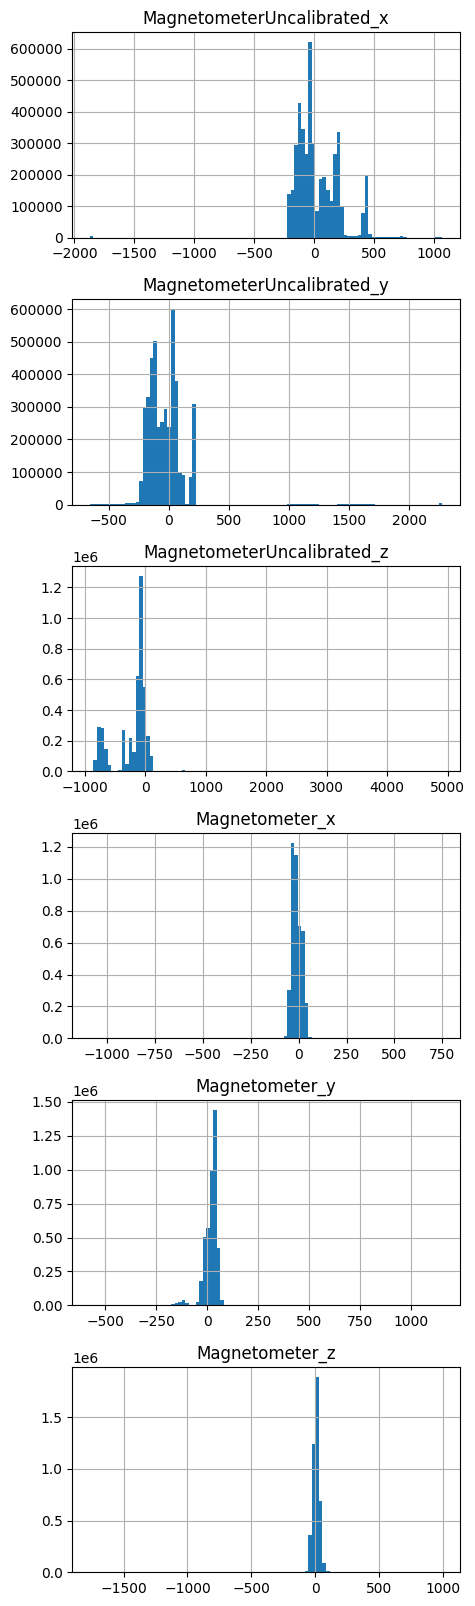

In [9]:
# plot distribution of pressure and relative altitude
# make figure bigger and create 2 subplots
fig, axs = plt.subplots(6, 1, figsize=(5, 20))
df.hist(column=columns, bins=100, ax=axs)

In [8]:
# get unique values each activity and person
activities = df['activity'].unique()
people = df['person'].unique()

<Axes: xlabel='timestamp'>

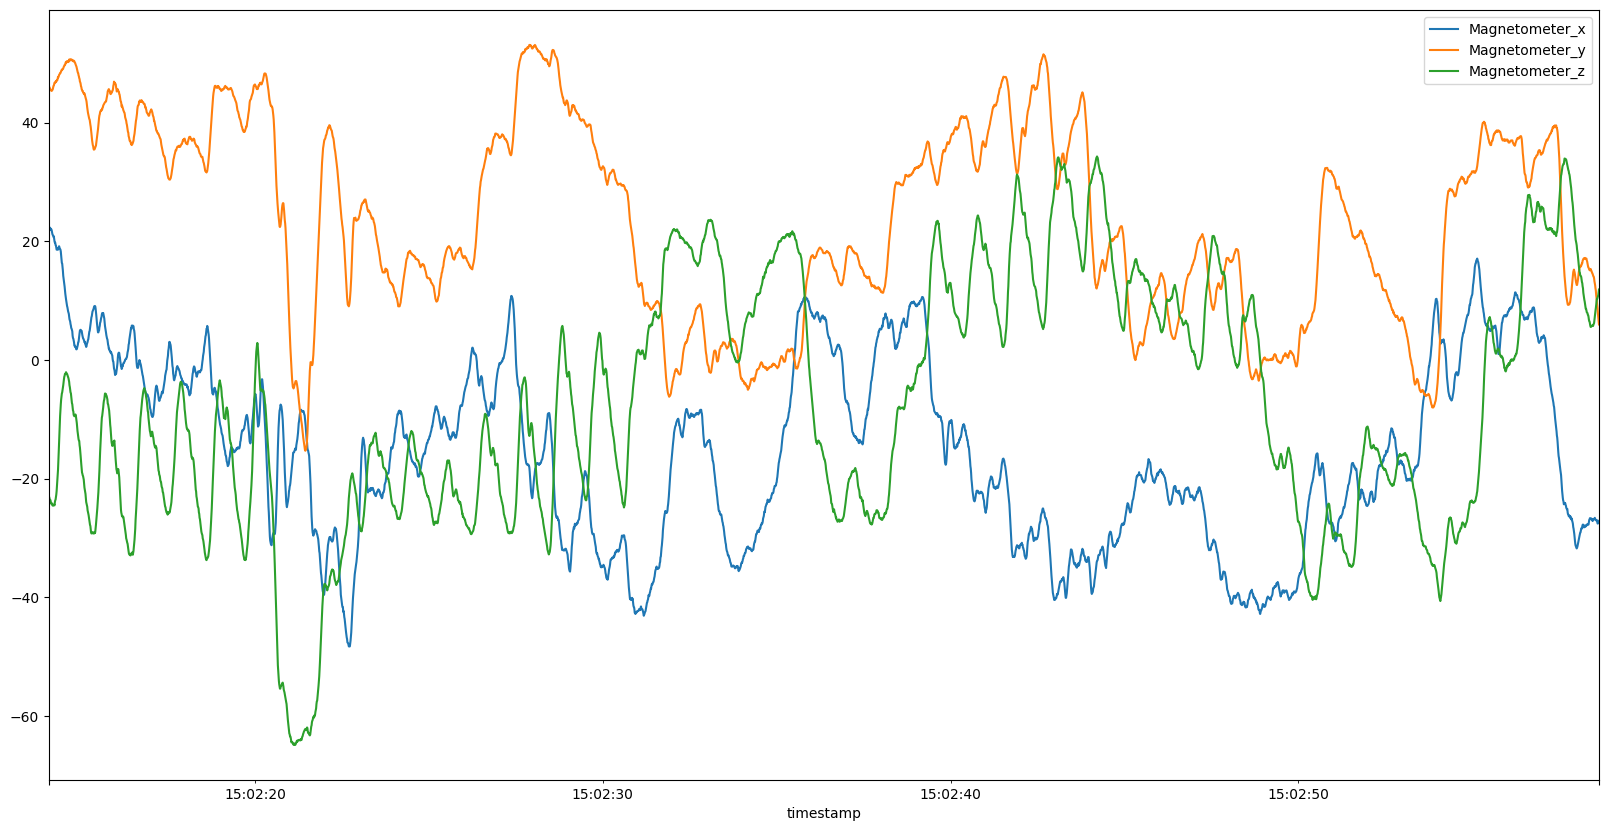

In [11]:
# visualize the data of the first hash
hash = df['hash'].unique()[0]
df[df['hash'] == hash].plot(y=["Magnetometer_x", "Magnetometer_y", "Magnetometer_z"], figsize=(20, 10))

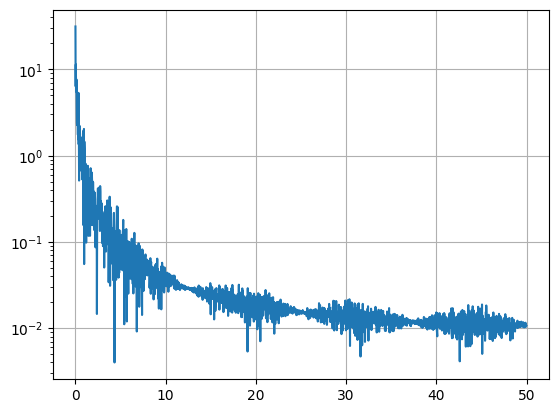

In [24]:
from scipy.fft import fft, fftfreq

# first hash
hash = df['hash'].unique()[0]
df_hash = df[df['hash'] == hash]

x = df_hash['Magnetometer_x'].values

# sample spacing
T = 1.0 / 100.0
yf = fft(x)
xf = fftfreq(x.size, T)[:x.size//2]

plt.plot(xf, 2.0/x.size * np.abs(yf[0:x.size//2]))
# y axis is log
plt.yscale('log')
plt.grid()
plt.show()

In [12]:
# create individual dataframes for each hash
dfs_by_hash = {}
frequencies = {}
for hash in df['hash'].unique():
    dfs_by_hash[hash] = df[df['hash'] == hash]
    frequencies[hash] = dfs_by_hash[hash].index.to_series().diff().value_counts().sort_index()

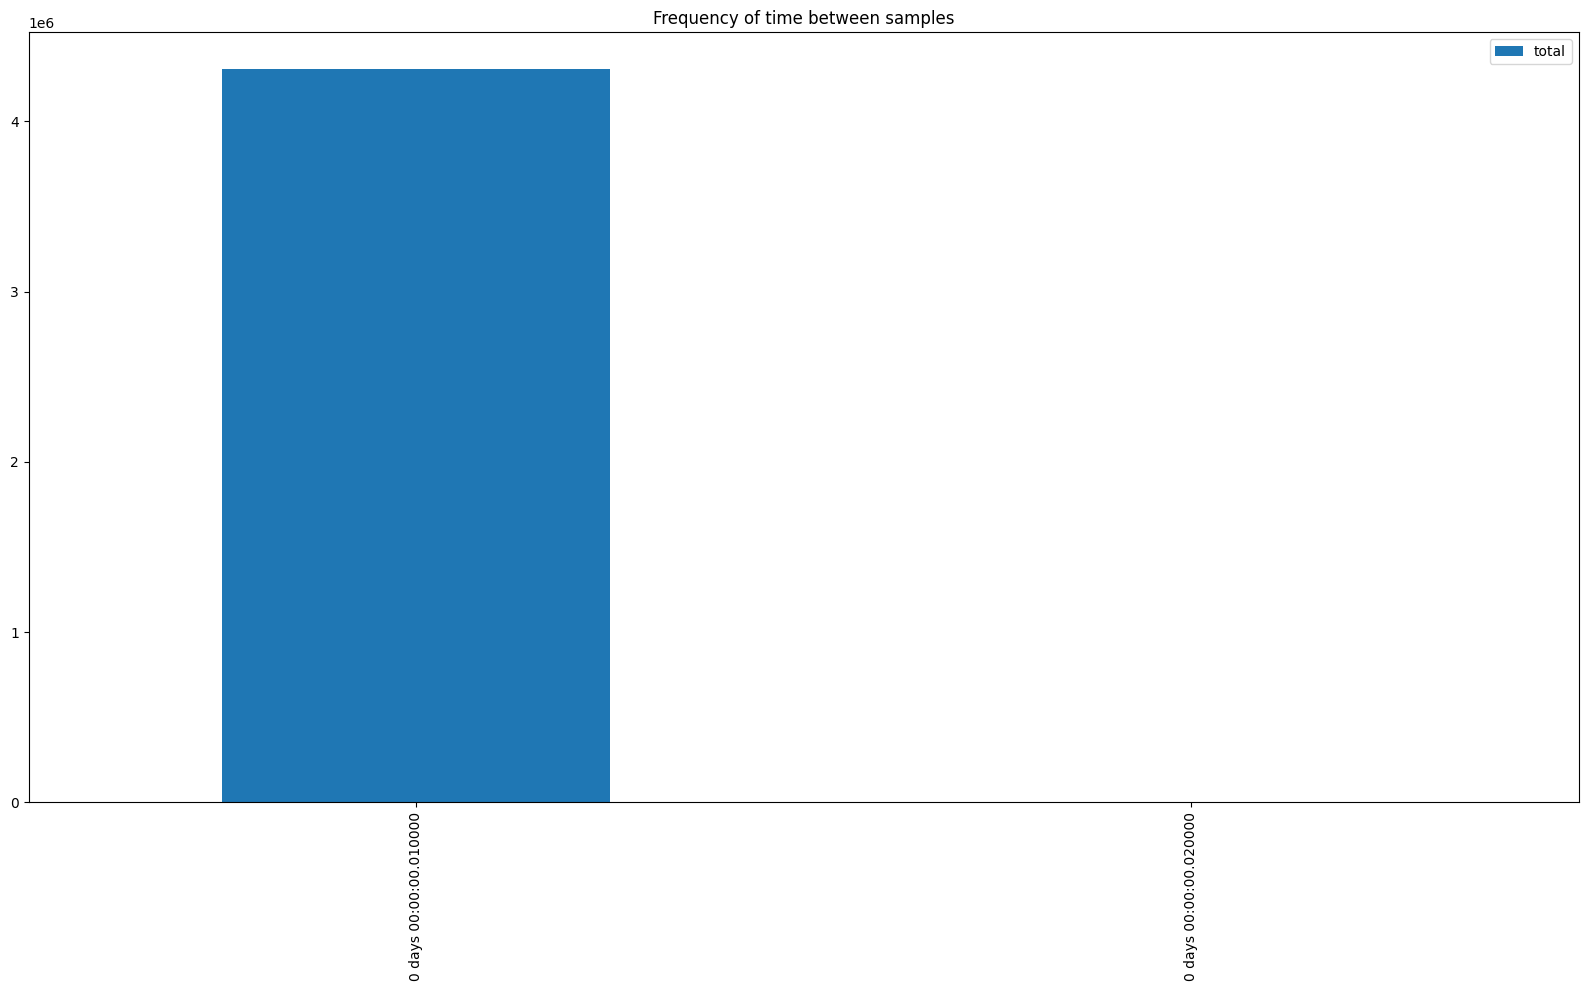

In [13]:
# combine all frequencies into one dataframe
frequencies_df = pd.DataFrame(frequencies).fillna(0).astype(int)
# summ all hash columns
frequencies_df['total'] = frequencies_df.sum(axis=1)
# drop hash columns
frequencies_df = frequencies_df.drop(columns=frequencies_df.columns[:-1])
# sort by total
frequencies_df = frequencies_df.sort_values(by=['total'], ascending=False)
# filter out rows with less than 0.1% of the total
frequencies_df = frequencies_df[frequencies_df['total'] > frequencies_df['total'].sum() * 0.0001]
# plot
frequencies_df.plot.bar(figsize=(20, 10), title="Frequency of time between samples")
plt.show()

Alle Messungen haben eine Samplingfrequency von 100Hz.